<a href="https://colab.research.google.com/github/subhanu777/softlab/blob/main/Rimeannian_Trust_region_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data on Manifolds

## Setup

In [6]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')

> We import the backend that will be used for geomstats computations and set a seed for reproducibility of the results.

In [17]:
import geomstats.backend as gs

gs.random.seed(2020)

INFO: Using numpy backend


In [4]:
pip install geomstats

     |████████████████████████████████| 10.1 MB 5.6 MB/s 
     |████████████████████████████████| 11.2 MB 36.4 MB/s 
     |████████████████████████████████| 895 kB 51.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Importing visualization module

In [18]:
import matplotlib
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

### From data on linear spaces to data on manifolds

In [21]:
from geomstats.geometry.euclidean import Euclidean

dim = 2
n_samples = 2

euclidean = Euclidean(dim=dim)
points_in_linear_space = euclidean.random_point(n_samples=n_samples)
print('Points in linear space:\n', points_in_linear_space)

linear_mean = gs.sum(points_in_linear_space, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in linear space:
 [[ 0.97255366  0.74678389]
 [ 0.01949105 -0.45632857]]
Mean of points:
 [0.49602235 0.14522766]


> We plot the points and their mean on the 2D Euclidean space, which is a linear space: a plane.

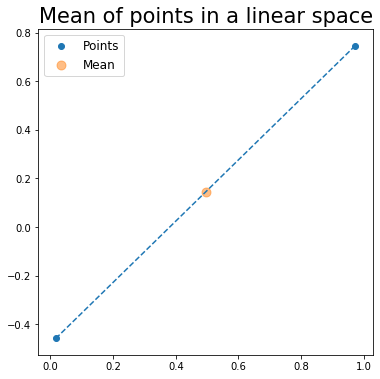

In [9]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(points_in_linear_space[:, 0], points_in_linear_space[:, 1], label='Points')
ax.plot(points_in_linear_space[:, 0], points_in_linear_space[:, 1], linestyle='dashed')

ax.scatter(
    gs.to_numpy(linear_mean[0]), 
    gs.to_numpy(linear_mean[1]), label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points in a linear space')
ax.legend();

> The non-linear spaces we consider are called manifolds. A manifold  of dimension  is a space that is allowed to be curved but that looks like an -dimensional vector space in the neighborhood of every point.

In [22]:
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=dim)
points_in_manifold = sphere.random_uniform(n_samples=n_samples)
print('Points in manifold:\n', points_in_manifold)

linear_mean = gs.sum(points_in_manifold, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in manifold:
 [[-0.71502435 -0.41197257 -0.56481748]
 [-0.997575   -0.04788171  0.05051201]]
Mean of points:
 [-0.85629967 -0.22992714 -0.25715273]


> The mean is not on the manifold, it is inside it

In [23]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(
    points_in_manifold, ax=ax, space='S2', label='Point', s=80)

ax.plot(
    points_in_manifold[:, 0], 
    points_in_manifold[:, 1], 
    points_in_manifold[:, 2], 
    linestyle='dashed', alpha=0.5)

ax.scatter(
    linear_mean[0], linear_mean[1], linear_mean[2], 
    label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points on a manifold')
ax.legend();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


AttributeError: ignored

ImportError: ignored

<Figure size 576x576 with 1 Axes>

In [20]:
import subprocess

print('Working directory: ', os.getcwd())

Working directory:  /content


> For points on a manifold, like the sphere, the operations like add, subtract are not permitted. Indeed, adding a vector to a point will not give a point that belongs to the manifold.

>The exponential map is the operation that generalizes the addition of a vector to a point, on manifolds.

>The exponential map takes a point and a tangent vector as inputs, and outputs the point on the manifold that is reached by "shooting" with the tangent vector. "Shooting" means taking the path of shortest length. This path is called a "geodesic".

In [22]:
import geomstats.datasets.utils as data_utils

data, names = data_utils.load_cities()

from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

paris = data[19]
vector = gs.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=paris)

result = sphere.metric.exp(tangent_vector, base_point=paris)

geodesic = sphere.metric.geodesic(
        initial_point=paris,
        initial_tangent_vec=tangent_vector)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

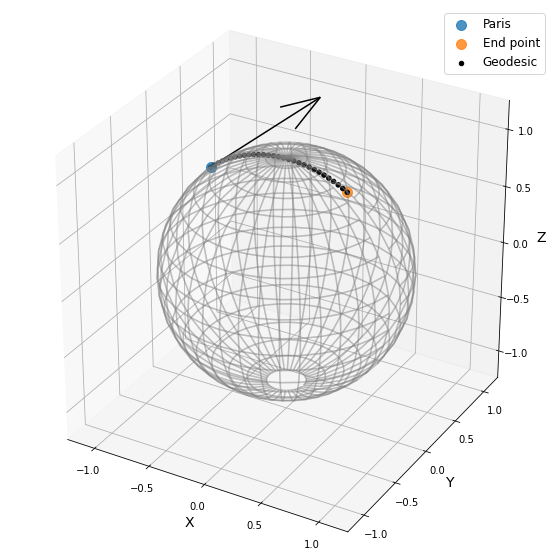

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(result, ax=ax, space='S2', s=100, alpha=0.8, label='End point')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=tangent_vector)
arrow.draw(ax, color='black')
ax.legend();

In [14]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
from scipy import optimize
from math import sqrt

# Objective function    
def f(x):
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
    
# Gradient
def jac(x):
    return np.array([-400*(x[1] - x[0]**2)*x[0] - 2 + 2*x[0], 200*x[1] - 200*x[0]**2])
# Hessian
def hess(x):
    return np.array([[1200*x[0]**2 - 400*x[1]+2, -400*x[0]], [-400*x[0], 200]])

    
def dogleg_method(Hk, gk, Bk, trust_radius):

    # Compute the Newton point.
    # This is the optimum for the quadratic model function.
    # If it is inside the trust radius then return this point.
    pB = -np.dot(Hk, gk)
    norm_pB = sqrt(np.dot(pB, pB))

    # Test if the full step is within the trust region.
    if norm_pB <= trust_radius:
        return pB
    
    # Compute the Cauchy point.
    # This is the predicted optimum along the direction of steepest descent.
    pU = - (np.dot(gk, gk) / np.dot(gk, np.dot(Bk, gk))) * gk
    dot_pU = np.dot(pU, pU)
    norm_pU = sqrt(dot_pU)

    # If the Cauchy point is outside the trust region,
    # then return the point where the path intersects the boundary.
    if norm_pU >= trust_radius:
        return trust_radius * pU / norm_pU

    # Find the solution to the scalar quadratic equation.
    # Compute the intersection of the trust region boundary
    # and the line segment connecting the Cauchy and Newton points.
    # This requires solving a quadratic equation.
    # ||p_u + tau*(p_b - p_u)||**2 == trust_radius**2
    # Solve this for positive time t using the quadratic formula.
    pB_pU = pB - pU
    dot_pB_pU = np.dot(pB_pU, pB_pU)
    dot_pU_pB_pU = np.dot(pU, pB_pU)
    fact = dot_pU_pB_pU**2 - dot_pB_pU * (dot_pU - trust_radius**2)
    tau = (-dot_pU_pB_pU + sqrt(fact)) / dot_pB_pU
    
    # Decide on which part of the trajectory to take.
    return pU + tau * pB_pU
    

def trust_region_dogleg(func, jac, hess, x0, initial_trust_radius=1.0,
                        max_trust_radius=100.0, eta=0.15, gtol=1e-4, 
                        maxiter=100):
    xk = x0
    trust_radius = initial_trust_radius
    k = 0
    while True:
      
        gk = jac(xk)
        Bk = hess(xk)
        Hk = np.linalg.inv(Bk)
        
        pk = dogleg_method(Hk, gk, Bk, trust_radius)
        print(pk)

        # Actual reduction.
        act_red = func(xk) - func(xk + pk)
        
        # Predicted reduction.
        pred_red = -(np.dot(gk, pk) + 0.5 * np.dot(pk, np.dot(Bk, pk)))
        
        # Rho.
        rhok = act_red / pred_red
        if pred_red == 0.0:
            rhok = 1e99
        else:
            rhok = act_red / pred_red
            
        # Calculate the Euclidean norm of pk.
        norm_pk = sqrt(np.dot(pk, pk))
        
        # Rho is close to zero or negative, therefore the trust region is shrunk.
        if rhok < 0.25:
            trust_radius = 0.25 * norm_pk
        else: 
        # Rho is close to one and pk has reached the boundary of the trust region, therefore the trust region is expanded.
            if rhok > 0.75 and norm_pk == trust_radius:
                trust_radius = min(2.0*trust_radius, max_trust_radius)
            else:
                trust_radius = trust_radius
        
        # Choose the position for the next iteration.
        if rhok > eta:
            xk = xk + pk
        else:
            xk = xk
            
        # Check if the gradient is small enough to stop
        if ln.norm(gk) < gtol:
            break
        
        # Check if we have looked at enough iterations
        if k >= maxiter:
            break
        k = k + 1
    return xk
        
result = trust_region_dogleg(f, jac, hess, [-1, -1])
print("Result of trust region dogleg method: {}".format(result))
print("Value of function at a point: {}".format(f(result)))

[0.29162283 0.95653339]
[0.01552323 0.52327223]
[ 1.17206197 -1.62057729]
[ 0.2973699  -0.40195913]
[0.08350078 0.01251469]
[ 0.42852422 -0.25761792]
[ 0.11303077 -0.05337646]
[ 0.237554   -0.07789799]
[0.10140617 0.05023221]
[0.23761854 0.0777009 ]
[0.01074844 0.06156883]
[0.10562334 0.06684841]
[0.07346995 0.10112945]
[0.08022882 0.09585581]
[0.07325009 0.10128882]
[0.06862121 0.10448028]
[0.06464433 0.10698649]
[0.06122557 0.10897903]
[0.04766893 0.09114561]
[0.0253654  0.05113151]
[0.01021342 0.02083478]
[0.00128741 0.00267575]
[2.68501244e-05 5.53562356e-05]
[8.90043282e-09 1.85217947e-08]
Result of trust region dogleg method: [1. 1.]
Value of function at a point: 8.61460760404633e-29


## Rimennian Trust Region Algo

In [28]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
from math import sqrt

def f(x):
  return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2   #obejctive function f(x,y)= (1-x)^2 +100(y-x^2)^2. -----ROSENBROCK'Fn~



#Jacobian df/dx= 2x-2-400(y-x^2)x
#.        df/dy= 200y-200x^2
def jacobian(x):
  return np.array([2*x[0] -2- 400*(x[1] - x[0]**2)*x[0] , 200*x[1] - 200*x[0]**2])       


#Hessian d^2f/dxdy = 1200 x^2 - 400y +2
#.       d^2d/dydx = -400x
#.       d^2f/dydy = 200
def hessian(x):
  return np.array([[1200*x[0]**2 - 400*x[1]+2 , -400*x[0]] , [-400*x[0] , 200]])


#code for truncatedCG

#def truncatedCG(gk,hk,trust_radius):


def truncatedCG(delta, g, Hd,n): #Conjugate Gradient procedure for approximately solving the trust region sub-problem, finds p
	zai = 0.1 	
	i = 0
	
	p = np.zeros(n)
	r = np.copy(-g)
	s = np.copy(r)

	rTr = np.dot(r,r)
	tau_stop = 1e-10
	while np.linalg.norm(r,2) > tau_stop:
		alpha = (rTr*1.0)/np.dot(s, Hd)
		p = p + alpha * s
		if np.linalg.norm(p,2) > delta:
			p = p - alpha * s
			pts = np.dot(p, s)
			ptp = np.dot(p, p)
			sts = np.dot(s, s)
			delta_sq = delta * delta
			rad = sqrt(pts * pts + sts * (delta_sq-ptp))
			if pts >= 0:
				alpha = ((delta_sq - ptp)*1.0)/(pts + rad)
			else:
				alpha = ((rad - pts)*1.0)/sts
			p = p + alpha * s
			r = r - alpha * Hd
			break
		r = r - alpha * Hd
		rnewTrnew = np.dot(r, r)
		beta = (rnewTrnew*1.0)/rTr
		s = beta * s
		s = s + r
		rTr = rnewTrnew
	del s
	del Hd
	return p



#initial_trust_radius = ITR
#max_trust_radius = MTR
#Max_iteration= mitr
#del_k = 1.0
#del_bar = 100.0
#x_k=x_0=[5,5]
#gtol= 1e-4 (needed)

def trust_region_truncatedCG(func,jac,hess,x_0,ITR=1.0, MTR=100.0,eta=0.15,gtol=1e-4):
  x_k=x_0
  trust_radius= ITR
  k=0
  for k in range(100):

    g_k = jacobian(x_k)
    H_k = hessian(x_k)
    I_k = np.linalg.inv(H_k)

    '''sol = optimize.minimize(f, X_0, method = "CG")
    sol.fun
    #p_k = truncatedCG(H_k,g_k,trust_radius)
    p_k= sol.x
    print(p_k)'''


    p_k= truncatedCG(trust_radius, g_k, H_k,2)
    print(p_k)

    actual_reduction = func(x_k) - func(x_k+p_k)
    predicted_reduction = -(np.dot(g_k,p_k) + 0.5 * np.dot(p_k, np.dot(H_k,p_k)))

    rho_k = actual_reduction/predicted_reduction
    if predicted_reduction == 0.0 :
      rho_k = 1e99
    else:
      rho_k = actual_reduction/predicted_reduction


    norm_pk = sqrt(np.dot(p_k,p_k))

    if rho_k < 1.0/4:
      trust_radius = 1.0/4 * norm_pk
    else:
      if rho_k > 3.0/4 and norm_pk == trust_radius :
        trust_radius = min(2.0 * trust_radius, MTR)
      else:
        trust_radius= trust_radius


    if rho_k>eta:
      x_k = x_k+p_k
    else:
      x_k = x_k


    #checking the gradient is small enough to stop
    if ln.norm(g_k) < gtol:
      break

    k= k+1
  return x_k

result = trust_region_truncatedCG(f, jacobian, hessian, [-1, -1])
print("Result of trust region CG method: {}".format(result))
print("Value of function at a point: {}".format(f(result)))


[0.89531628 0.44543098]
[0.44626043 1.94957729]
[ 1.13395698 -1.64746519]
[ 0.28348925 -0.4118663 ]
[ 0.78243638 -0.62273053]
[ 0.1956091  -0.15568263]
[ 0.42780723 -0.25880683]
[-0.46422488  0.185729  ]
[ 0.42279518 -0.26691615]
[-0.92399302  0.38240933]
[-0.23099826  0.09560233]
[-0.44497807  0.22802306]
[ 0.36546209 -0.34122933]
[-0.43650102  0.24385827]
[ 0.34066899 -0.36598448]
[-0.42359722  0.26564148]
[ 0.30440854 -0.39665532]
[-0.40179758  0.29758815]
[ 0.24954737 -0.43327371]
[-0.35956261  0.34744026]
[ 0.1694363  -0.47041614]
[-0.26838193  0.42186626]
[ 0.0820252  -0.49322598]
[-0.23664821  0.9715954 ]
[-0.30633261 -1.97640085]
[1.24108723 1.56834387]
[0.31027181 0.39208597]
[0.17199233 0.98509829]
[ 0.21520215 -0.97656952]
[-0.51826855  0.85521793]
[-0.56071647 -1.91979089]
[3.36174836 2.1676365 ]
[-3.92755425  0.75783747]
[-0.98188856  0.18945937]
[-1.90997659  0.59328697]
[-0.47749415  0.14832174]
[-0.91471941  0.40408959]
[ 0.10051521 -0.22890324]
[ 0.13498043 -0.21042881

In [15]:
from scipy import optimize
X_0 = [-1,-1] # Initial guess
sol1 = optimize.minimize(f, X_0, method = "CG")
sol1

sol2 = optimize.minimize(f, X_0,jac=jacobian, hess=hessian, tol=1e-7, method='dogleg')
sol2.x
sol2

     fun: 2.237920149637445e-17
    hess: array([[ 801.99999244, -399.99999811],
       [-399.99999811,  200.        ]])
     jac: array([-3.67091427e-09, -2.89298896e-09])
 message: 'Optimization terminated successfully.'
    nfev: 22
    nhev: 19
     nit: 21
    njev: 20
  status: 0
 success: True
       x: array([1.        , 0.99999999])

In [15]:
pip install matplotlib

     |████████████████████████████████| 35.7 MB 327 kB/s 
  Created wheel for matplotlib: filename=matplotlib-2.1.0-cp37-cp37m-linux_x86_64.whl size=10229371 sha256=56fad97be7fac34d45f6d7c4bf3817a526d240fcad00e3c67db0c6ae403b2127
  Stored in directory: /root/.cache/pip/wheels/73/91/90/82e0effbb1a7e87eede54caf035471f9dc061eac46c14a5152
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.11.2 requires matplotlib>=2.2, but you have matplotlib 2.1.0 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.1.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.1.0 which is incompatible.
geomst

In [1]:
def truncatedCG(Hk, gk, rk):
  tau_stop=1e-10
  p0=0
  r0=gk
  s0=-gk
  k=0
  max_iteration=100

  rkTrk = np.dot(rk,rk)

  while np.linalg.norm(rk,2)> tau_stop:
    #sTbs = np.dot(gk, np.dot(Bk, gk)))

    alpha = (rkTrk * 1.0)/ np.dot()